In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


In [2]:
# test=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\archive (3)\\test.csv")
# test.head()

In [2]:
train=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\archive (3)\\train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.loc[train['Sex']=='male','Sex']=1
train.loc[train['Sex']=='female','Sex']=0

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


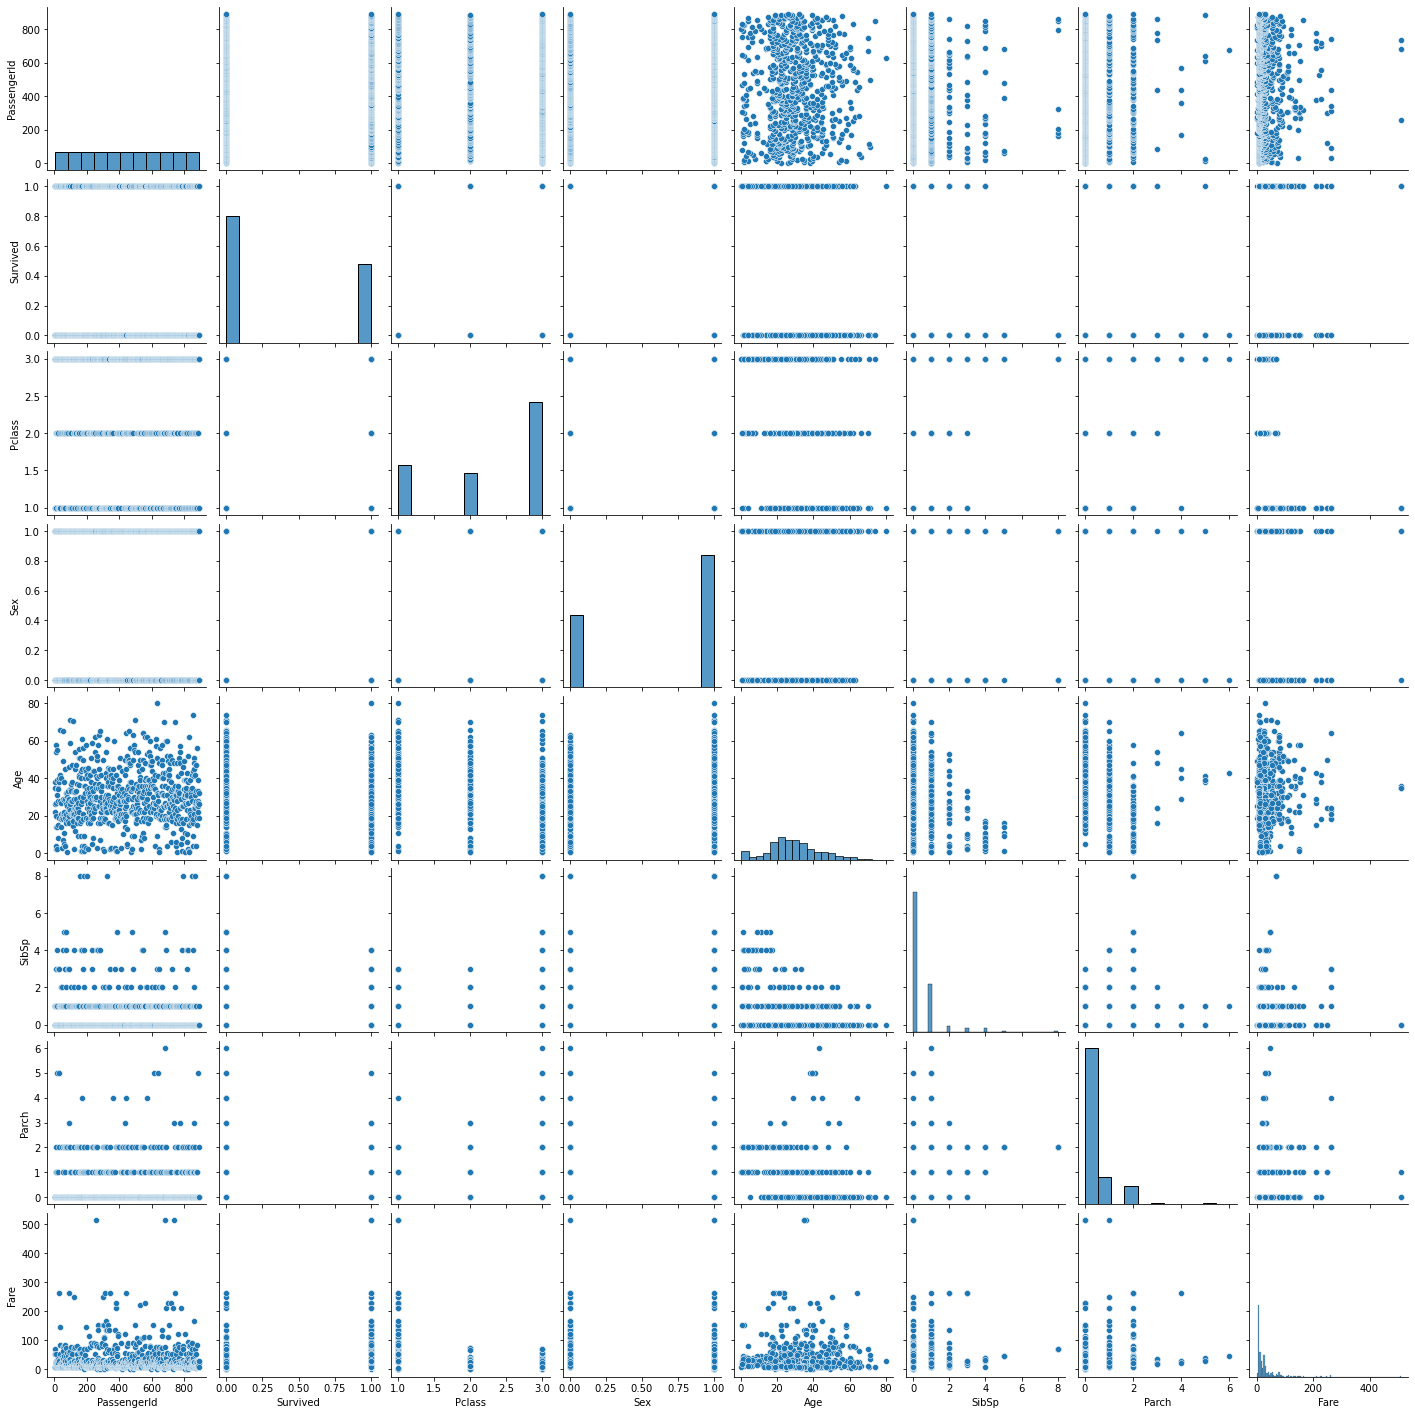

In [7]:
sns.pairplot(data=train)

<AxesSubplot:xlabel='Age'>

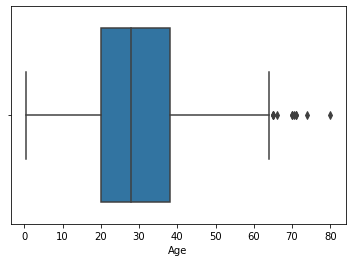

In [8]:
sns.boxplot(x="Age",data=train)

- Using median as age column has outliers and median is not affected by outliers

In [9]:

train['Age'].fillna(train['Age'].median(), inplace=True) 

<AxesSubplot:xlabel='Survived', ylabel='count'>

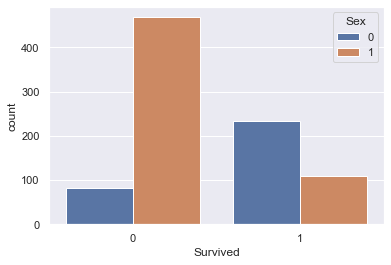

In [10]:
sns.set_theme( style='darkgrid',palette='deep',)
sns.countplot(x="Survived",hue="Sex",data=train)

In [11]:
# train.dropna(inplace=True)
# train.isnull().sum()

In [12]:

# 
train.drop(train[train['Embarked'].isnull()].index, inplace=True)

In [13]:
train.drop(train[train['Cabin'].isnull()].index, inplace=True)

In [14]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:

train.Ticket = train.Ticket.astype('category').cat.codes # encoding Embarked Column
train.Name = train.Name.astype('category').cat.codes # encoding Embarked Column
train.Sex = train.Sex.astype('category').cat.codes # encoding Embarked Column
train.Embarked = train.Embarked.astype('category').cat.codes # encoding Embarked Column
train.Cabin = train.Cabin.astype('category').cat.codes # encoding Embarked Column

In [17]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name             int16
Sex               int8
Age            float64
SibSp            int64
Parch            int64
Ticket           int16
Fare           float64
Cabin            int16
Embarked          int8
dtype: object

In [18]:
train.drop(["Name","Cabin","Ticket","PassengerId","Embarked"],axis=1, inplace=True)         

In [19]:
train.shape

(202, 7)

In [20]:
# features=["Pclass","Age","Parch","Fare","Sex"]
# X=train[features]
# y=train["Survived"]

In [36]:
X_train=train.drop('Survived', axis = 1)
y_train=train['Survived']


In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [38]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [39]:
y_pred = model.predict(X_test)

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler= StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [42]:
scaled_X_train= scaler.transform(X_train)
scaled_X_test= scaler.transform(X_test)

In [43]:
# for training the model
X = train.drop('Survived', axis=1)
y = train['Survived']

# for creating a prediction
# X_test = train.drop('PassengerId', axis=1)


In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
model=KNeighborsClassifier(n_neighbors=10,metric="manhattan")



In [46]:
model.fit(X,y)

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

In [47]:
model.score(X,y)

0.7376237623762376

In [48]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(i).fit(X,y)
    error_rate.append(knn.score(X,y))
    print(error_rate,end="")
    
    



[0.995049504950495][0.995049504950495, 0.801980198019802][0.995049504950495, 0.801980198019802, 0.7970297029702971][0.995049504950495, 0.801980198019802, 0.7970297029702971, 0.7673267326732673][0.995049504950495, 0.801980198019802, 0.7970297029702971, 0.7673267326732673, 0.7722772277227723][0.995049504950495, 0.801980198019802, 0.7970297029702971, 0.7673267326732673, 0.7722772277227723, 0.7722772277227723][0.995049504950495, 0.801980198019802, 0.7970297029702971, 0.7673267326732673, 0.7722772277227723, 0.7722772277227723, 0.7425742574257426][0.995049504950495, 0.801980198019802, 0.7970297029702971, 0.7673267326732673, 0.7722772277227723, 0.7722772277227723, 0.7425742574257426, 0.7277227722772277][0.995049504950495, 0.801980198019802, 0.7970297029702971, 0.7673267326732673, 0.7722772277227723, 0.7722772277227723, 0.7425742574257426, 0.7277227722772277, 0.7277227722772277][0.995049504950495, 0.801980198019802, 0.7970297029702971, 0.7673267326732673, 0.7722772277227723, 0.7722772277227723

[0.995049504950495, 0.801980198019802, 0.7970297029702971, 0.7673267326732673, 0.7722772277227723, 0.7722772277227723, 0.7425742574257426, 0.7277227722772277, 0.7277227722772277, 0.7277227722772277, 0.7227722772277227, 0.7277227722772277, 0.7277227722772277, 0.7029702970297029, 0.7178217821782178, 0.7277227722772277, 0.7277227722772277, 0.7079207920792079, 0.698019801980198, 0.7079207920792079, 0.693069306930693, 0.7227722772277227, 0.6881188118811881, 0.698019801980198, 0.693069306930693, 0.693069306930693, 0.6831683168316832, 0.6782178217821783, 0.6782178217821783, 0.6881188118811881][0.995049504950495, 0.801980198019802, 0.7970297029702971, 0.7673267326732673, 0.7722772277227723, 0.7722772277227723, 0.7425742574257426, 0.7277227722772277, 0.7277227722772277, 0.7277227722772277, 0.7227722772277227, 0.7277227722772277, 0.7277227722772277, 0.7029702970297029, 0.7178217821782178, 0.7277227722772277, 0.7277227722772277, 0.7079207920792079, 0.698019801980198, 0.7079207920792079, 0.6930693

Text(0, 0.5, 'Error_rate')

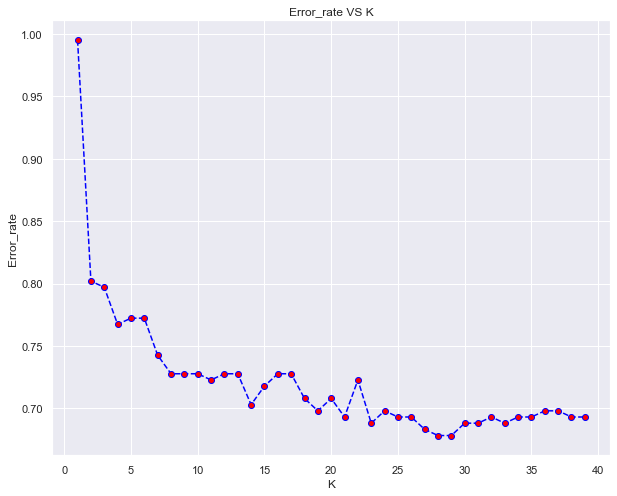

In [49]:
plt.figure(figsize=(10,8))
plt.plot(range(1,40),error_rate,color="blue",linestyle="dashed",marker="o",markerfacecolor="red")
plt.title("Error_rate VS K")
plt.xlabel("K")
plt.ylabel("Error_rate")

In [30]:
print("miminum error_rate:",min(error_rate) )
error_rate.index(min(error_rate))

miminum error_rate: 0.6782178217821783


27

In [32]:
model=KNeighborsClassifier(n_neighbors=27,metric="manhattan")
model.fit(X,y)
model.score(X,y)


0.7029702970297029

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score


In [50]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 2,  6],
       [ 0, 13]], dtype=int64)

In [51]:
accuracy_score(y_test,y_pred)


0.7142857142857143

- Svm model


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [53]:
model=SVC()
model.fit(X,y)

SVC()

In [54]:
y_pred=model.predict(X_test)

In [55]:
accuracy_score(y_test,y_pred)

0.6190476190476191

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 0,  8],
       [ 0, 13]], dtype=int64)

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1, 10, 100, 1000],'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(svm,param_grid, cv=5)

In [59]:
grid.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [60]:
grid.best_estimator_

SVC(C=1000, gamma=0.0001)

In [61]:
model.score(X,y)


0.6633663366336634

In [63]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

75.14

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=5)

In [66]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [67]:
dt.score(X_test, y_test)

0.9047619047619048

In [68]:
y_pred = dt.predict(X_test) # making prediction 

In [69]:
accuracy_score(y_test, y_pred) # Shift + Tab

0.9047619047619048

In [70]:
# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "criterion": ["gini", "entropy"]}

In [74]:




from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [1]:
# run grid search
# grid_search = GridSearchCV(train, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)